In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel

In [3]:
def voigt1(x,s1,g1,o1,scale1):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)#+a*x**2+b
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)#+a*x**2+b

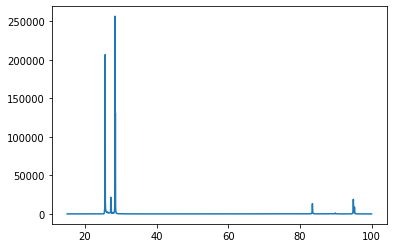

In [4]:
path =  'Data\si111_30_20_ohne.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])
plt.plot(data[0],data[1])

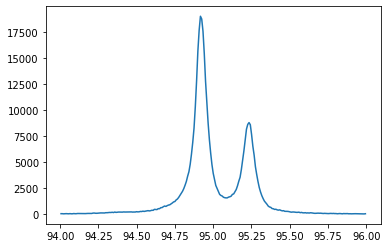

In [5]:
x=[[],[]]
for i in range(len(data[1])):
    if 94<data[0,i]<96:
        x[0].append(data[0,i])
        x[1].append(data[1,i])
plt.plot(x[0],x[1])

In [18]:
for i in range(len(data[0])):
    if data[0,i]>=53.25:
        print(i)
        break

4577


b1 = [25,26.2]->[1196,1339]  
a1 = [28,29]->[1555,1675]  
b2 = [52.25,53.25]->[4457,4577]  
a2 = [58.5,59.4]->[5205,5313]  
b3 = [82.5,84.5]->[8077,8317]  
a3 = [94,96]->[9454,9693]  

In [7]:
#modell erstellen  
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=25.6,min=25.5,max=25.75)
pars_voigt["scale1"].set(7000)

#Fitten
out_voigt = model_voigt.fit(data[1,667:733],x=data[0,667:733],params=pars_voigt,weights=1/data[2,667:733],nan_policy='propagate')
b1f=out_voigt.fit_report()
b1p=np.array([np.arange(25,26,0.001),out_voigt.eval(x=np.arange(25,26,0.001))])

<ipython-input-7-7a27cfe66d2f>:16: RuntimeWarning: divide by zero encountered in true_divide
  out_voigt = model_voigt.fit(data[1,667:733],x=data[0,667:733],params=pars_voigt,weights=1/data[2,667:733],nan_policy='propagate')


In [8]:
#modell erstellen b1 = [25,26.2]->[1196,1339]  
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=25.5,min=25,max=26.2)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,1196:1339],x=data[0,1196:1339],params=pars_voigt,weights=1/data[2,1196:1339],nan_policy='propagate')
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(25,26.2,0.001),out_voigt.eval(x=np.arange(25,26.2,0.001))])

In [9]:
#modell erstellen a1 = [28,29]->[1555,1675]    
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=28.4,min=28,max=29)
pars_voigt["o2"].set(value=28.5,min=28,max=29)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,1555:1675],x=data[0,1555:1675],params=pars_voigt,weights=1/data[2,1555:1675],nan_policy='propagate')
a3f=out_voigt.fit_report()
a3p=np.array([np.arange(28,29,0.001),out_voigt.eval(x=np.arange(28,29,0.001))])

[[Model]]
    Model(voigt1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1618
    # data points      = 120
    # variables        = 4
    chi-square         = 607.640303
    reduced chi-square = 5.23827847
    Akaike info crit   = 202.650963
    Bayesian info crit = 213.800930
##  Warning: uncertainties could not be estimated:
    scale1:  at boundary
[[Variables]]
    s1:      4.5789e-06 (init = 0.084)
    g1:      0.47742826 (init = 0.041)
    o1:      52.6966581 (init = 52.677)
    scale1:  25.0000000 (init = 100)


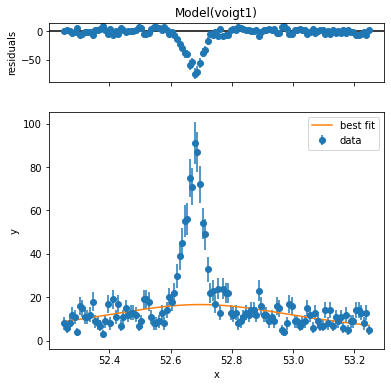

In [17]:
#modell erstellen    b2 = [52.25,53.25]->[4457,4577]4457:4577
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.084,min=0,max=1)
pars_voigt["g1"].set(value=0.041,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=52.677,min=52.6,max=52.8)
pars_voigt["scale1"].set(100,min=25)

#Fitten
out_voigt = model_voigt.fit(data[1,4457:4577],x=data[0,4457:4577],weights=1/data[2,4457:4577],params=pars_voigt,nan_policy='propagate')
out_voigt.plot()
print(out_voigt.fit_report())
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(52.25,53.25,0.001),out_voigt.eval(x=np.arange(52.25,53.25,0.001))])